# Ridge, Lasso Regression

In [12]:
#Boston Housing Dataset: Load the boston dataset.

from sklearn.datasets import load_boston
boston = load_boston()

In [13]:
#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

## RIDGE REGRESSION

The first type of regularized regression that we'll look at is called ridge regression 
in which our loss function is the standard OLS function plus the squared value of each coefficient 
multipled by some constant alpha

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

When minimizing the loss function to fit to our data, models are penalized for
coefficients with a large magnitude: large positive and large negative coefficients

NOTE that alpha is a parameter that we need to choose in order to fit and predict
essentially, we can select the alpha for which our model performs best (hyper parameter tuning)

alpha controls model complexity
Notice that when alpha=0 we get back OLS (large coeff no penalized - overfitting problem is not accounted for)
Very high alpha can lead to underfitting the data (model too simple)
alpha controls regularization strength; must be a positive float. 

Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
Larger values specify stronger regularization.

In [14]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Ridge
import numpy as np

regressor = Ridge()

parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}
#note that we set alpha using the argument alpha
#also notice the argument normalize: setting this equal to True ensures that all 
#our variables are on the same scale

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.715183 using {'alpha': 0.01, 'normalize': True}
0.714624 (0.047374) with: {'alpha': 0.001, 'normalize': True}
0.714539 (0.047479) with: {'alpha': 0.001, 'normalize': False}
0.715183 (0.046473) with: {'alpha': 0.01, 'normalize': True}
0.714561 (0.047490) with: {'alpha': 0.01, 'normalize': False}
0.712603 (0.039874) with: {'alpha': 0.1, 'normalize': True}
0.714609 (0.047609) with: {'alpha': 0.1, 'normalize': False}
0.626445 (0.022256) with: {'alpha': 1, 'normalize': True}
0.712243 (0.048163) with: {'alpha': 1, 'normalize': False}
0.289659 (0.008238) with: {'alpha': 10, 'normalize': True}
0.707499 (0.045455) with: {'alpha': 10, 'normalize': False}


0.7097594050919813

In [15]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

import pandas as pd
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimatedCoefficients'])

Intercept:  30.20073848424373


,features,estimatedCoefficients
0,CRIM,-0.128532
1,ZN,0.032892
2,INDUS,0.036090
3,CHAS,3.188852
4,NOX,-14.370004
5,RM,4.083665
6,AGE,-0.011115
7,DIS,-1.321811
8,RAD,0.212383
9,TAX,-0.007355


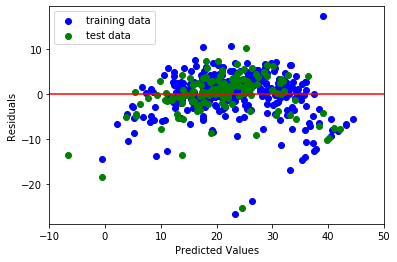

In [16]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [17]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  3.342629638563762
MSE train:  22.562120572150985
RMSE train:  4.749960060058504
r2:  0.8621545395746656
MAE test:  3.156681831463841
MSE test:  21.62672518605578
RMSE test:  4.6504542988890645
r2:  0.8424721984089334


## Lasso Regression

Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. 

$ \min_{w} ||X w - y||_2 ^ 2 + \alpha ||w||_1 $

In [19]:
    
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Lasso
import numpy as np

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

lasso_coef = gs.best_estimator_.coef_
print(lasso_coef)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(X_test, y_test)

[-1.26546563e-01  3.16292910e-02  2.36700252e-02  3.15291357e+00
 -1.42881275e+01  4.06504267e+00 -9.54851327e-03 -1.32356257e+00
  2.03033662e-01 -6.68563539e-03 -8.93755429e-01  1.15172938e-02
 -5.47459324e-01]
***GRIDSEARCH RESULTS***
Best score: 0.714820 using {'alpha': 0.001, 'normalize': True}
0.714820 (0.046686) with: {'alpha': 0.001, 'normalize': True}
0.714573 (0.047444) with: {'alpha': 0.001, 'normalize': False}
0.709436 (0.040326) with: {'alpha': 0.01, 'normalize': True}
0.714387 (0.047288) with: {'alpha': 0.01, 'normalize': False}
0.627990 (0.016995) with: {'alpha': 0.1, 'normalize': True}
0.705277 (0.044774) with: {'alpha': 0.1, 'normalize': False}
-0.002239 (0.001863) with: {'alpha': 1, 'normalize': True}
0.658926 (0.028616) with: {'alpha': 1, 'normalize': False}
-0.002239 (0.001863) with: {'alpha': 10, 'normalize': True}
0.520873 (0.043276) with: {'alpha': 10, 'normalize': False}


0.7097717791957663

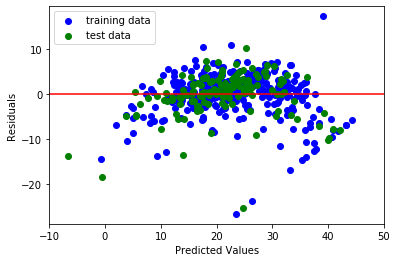

In [20]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [21]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  3.345706806478646
MSE train:  22.571055109185203
RMSE train:  4.75090045246006
r2:  0.8620955873688986
MAE test:  3.154235099576903
MSE test:  21.625803153277875
RMSE test:  4.6503551642082
r2:  0.8424795423010378
